# Loans Dataset

## DataFrame Information

#### Loading the Data / Quick Overview

This is to be able to clearly and quickly distinguish how many values we have and how many columns there are in the data set right from the onset.

In [1]:
import pandas as pd
import numpy as np
loans_df = pd.read_csv("loan_payments_data.csv") 
# Displays all the columns in the Data set 
display_columns = pd.set_option('display.max_columns', None)
loans_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           54231 non-null  int64  
 1   member_id                    54231 non-null  int64  
 2   loan_amount                  54231 non-null  int64  
 3   funded_amount                51224 non-null  float64
 4   funded_amount_inv            54231 non-null  float64
 5   term                         49459 non-null  object 
 6   int_rate                     49062 non-null  float64
 7   instalment                   54231 non-null  float64
 8   grade                        54231 non-null  object 
 9   sub_grade                    54231 non-null  object 
 10  employment_length            52113 non-null  object 
 11  home_ownership               54231 non-null  object 
 12  annual_inc                   54231 non-null  float64
 13  verification_sta

In [2]:
loans = loans_df.head(10)
print("Top 10 values from each column in data set: ")
print(loans)
#Displays a total count of rows and columns 
print ("Count of Rows and Columns: ")
print(loans_df.shape)

Top 10 values from each column in data set: 
         id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0  38676116   41461848         8000         8000.0             8000.0   
1  38656203   41440010        13200        13200.0            13200.0   
2  38656154   41439961        16000        16000.0            16000.0   
3  38656128   41439934        15000        15000.0            15000.0   
4  38656121   41439927        15000        15000.0            15000.0   
5  38656111   41439917         2525         2525.0             2525.0   
6  38656110   41439916         6675         6675.0             6675.0   
7  38656067   41439872        26500        26500.0            26200.0   
8  38656063   41439868        10000        10000.0            10000.0   
9  38656052   41439857        10000            NaN            10000.0   

        term  int_rate  instalment grade sub_grade employment_length  \
0  36 months      7.49      248.82     A        A4           5 years   
1  36 m

##### Statistical Values 
A brief overview of the mean median and mode and other statistical functions to give insight to the symmetry distribution, value range and general data distribution

In [3]:
from db_utils import DataFrameInfo
info = DataFrameInfo
#Displays Statistical values, Column Data Types and Unique values
print("\nStatistical Values:")
print(loans_df.describe().round(3))





             id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0      38676116   41461848         8000         8000.0             8000.0   
1      38656203   41440010        13200        13200.0            13200.0   
2      38656154   41439961        16000        16000.0            16000.0   
3      38656128   41439934        15000        15000.0            15000.0   
4      38656121   41439927        15000        15000.0            15000.0   
...         ...        ...          ...            ...                ...   
54226     76597      76583         5000         5000.0             1775.0   
54227    142608      74724         5000         5000.0             2350.0   
54228    117045      70978         3500         3500.0             2225.0   
54229     88854      70699         5000         5000.0              225.0   
54230     72323      70694         5000         5000.0              350.0   

            term  int_rate  instalment grade sub_grade employment_length  \

#### Distinct Values
This helps us take a closer look at the data set, a dataset with less distinct values can either be full of repetition and require cleaning or could be a categorical column.


In [4]:
print("  Total distinct values in each column     ")
for col in loans_df.columns:
    distinct_counts = loans_df[col].nunique()
    print (f" Total distinct values in '{col}': {distinct_counts}")
    print("-----------------------------")
    categorical_columns = [col for col in loans_df.columns if loans_df[col].nunique() < 20]
if distinct_counts < 20:
    categorical_columns.append(col) 
print ("categorical_columns:")
print(categorical_columns)

  Total distinct values in each column     
 Total distinct values in 'id': 54231
-----------------------------
 Total distinct values in 'member_id': 54231
-----------------------------
 Total distinct values in 'loan_amount': 1083
-----------------------------
 Total distinct values in 'funded_amount': 1122
-----------------------------
 Total distinct values in 'funded_amount_inv': 5261
-----------------------------
 Total distinct values in 'term': 2
-----------------------------
 Total distinct values in 'int_rate': 457
-----------------------------
 Total distinct values in 'instalment': 19940
-----------------------------
 Total distinct values in 'grade': 7
-----------------------------
 Total distinct values in 'sub_grade': 35
-----------------------------
 Total distinct values in 'employment_length': 11
-----------------------------
 Total distinct values in 'home_ownership': 5
-----------------------------
 Total distinct values in 'annual_inc': 6132
-----------------------

We can conclude some of these columns will contain categorical data as there is such a few number of unique values

In [5]:
#List of Numerical Columns
numeric_cols = loans_df.select_dtypes(include=['float64', 'int64'])
num_cols = [column for column in loans_df.columns if loans_df[column].dtypes in ['int64', 'float64']] 

print('Number of Numerical Columns: ', len (num_cols))
print("Numerical Columns:")
print(numeric_cols.columns.tolist())

Number of Numerical Columns:  28
Numerical Columns:
['id', 'member_id', 'loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate', 'instalment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_amount', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code']


This sets out which columns are numerical as when transforming the data set it is only the numerical columns that will provide usable data.

Nulls Checker 

In [6]:
from db_utils import NullPercentageCalculator
calculator = NullPercentageCalculator
nulls_check = calculator.count_null_values(loans_df)
print(nulls_check)

id                                 0
member_id                          0
loan_amount                        0
funded_amount                   3007
funded_amount_inv                  0
term                            4772
int_rate                        5169
instalment                         0
grade                              0
sub_grade                          0
employment_length               2118
home_ownership                     0
annual_inc                         0
verification_status                0
issue_date                         0
loan_status                        0
payment_plan                       0
purpose                            0
dti                                0
delinq_2yrs                        0
earliest_credit_line               0
inq_last_6mths                     0
mths_since_last_delinq         31002
mths_since_last_record         48050
open_accounts                      0
total_accounts                     0
out_prncp                          0
o

Data Types

Knowing the distinct types of data we have in the dataset will be essential later on when transforming the data 

In [7]:
print("Column Data Types:")
print(loans_df.dtypes)

Column Data Types:
id                               int64
member_id                        int64
loan_amount                      int64
funded_amount                  float64
funded_amount_inv              float64
term                            object
int_rate                       float64
instalment                     float64
grade                           object
sub_grade                       object
employment_length               object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_date                      object
loan_status                     object
payment_plan                    object
purpose                         object
dti                            float64
delinq_2yrs                      int64
earliest_credit_line            object
inq_last_6mths                   int64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_accounts                    int64
total_

Checking the Dataset to see if they are any datetime columns as from the data set can see there are columns involving dates so will need to be cleaned effectively.

In [8]:
year_columns_count = [column for column in loans_df.columns if loans_df[column].dtypes in ['datetime64']]
print('Year Columns Count: '), len(year_columns_count)

Year Columns Count: 


(None, 0)

As you can see, there 0 columns with the datetime type however in the dataset we can see that we have dates mentioned so this will need to be transformed.

In [9]:

from db_utils import NullPercentageCalculator
calculator = NullPercentageCalculator
columns = calculator.list_columns(loans_df)
print("List of all the columns")
print (columns)





List of all the columns
['id', 'member_id', 'loan_amount', 'funded_amount', 'funded_amount_inv', 'term', 'int_rate', 'instalment', 'grade', 'sub_grade', 'employment_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_date', 'loan_status', 'payment_plan', 'purpose', 'dti', 'delinq_2yrs', 'earliest_credit_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_date', 'last_payment_amount', 'next_payment_date', 'last_credit_pull_date', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type']


##### Nulls 

Initial Null Count: 
id                                 0
member_id                          0
loan_amount                        0
funded_amount                   3007
funded_amount_inv                  0
term                            4772
int_rate                        5169
instalment                         0
grade                              0
sub_grade                          0
employment_length               2118
home_ownership                     0
annual_inc                         0
verification_status                0
issue_date                         0
loan_status                        0
payment_plan                       0
purpose                            0
dti                                0
delinq_2yrs                        0
earliest_credit_line               0
inq_last_6mths                     0
mths_since_last_delinq         31002
mths_since_last_record         48050
open_accounts                      0
total_accounts                     0
out_prncp        

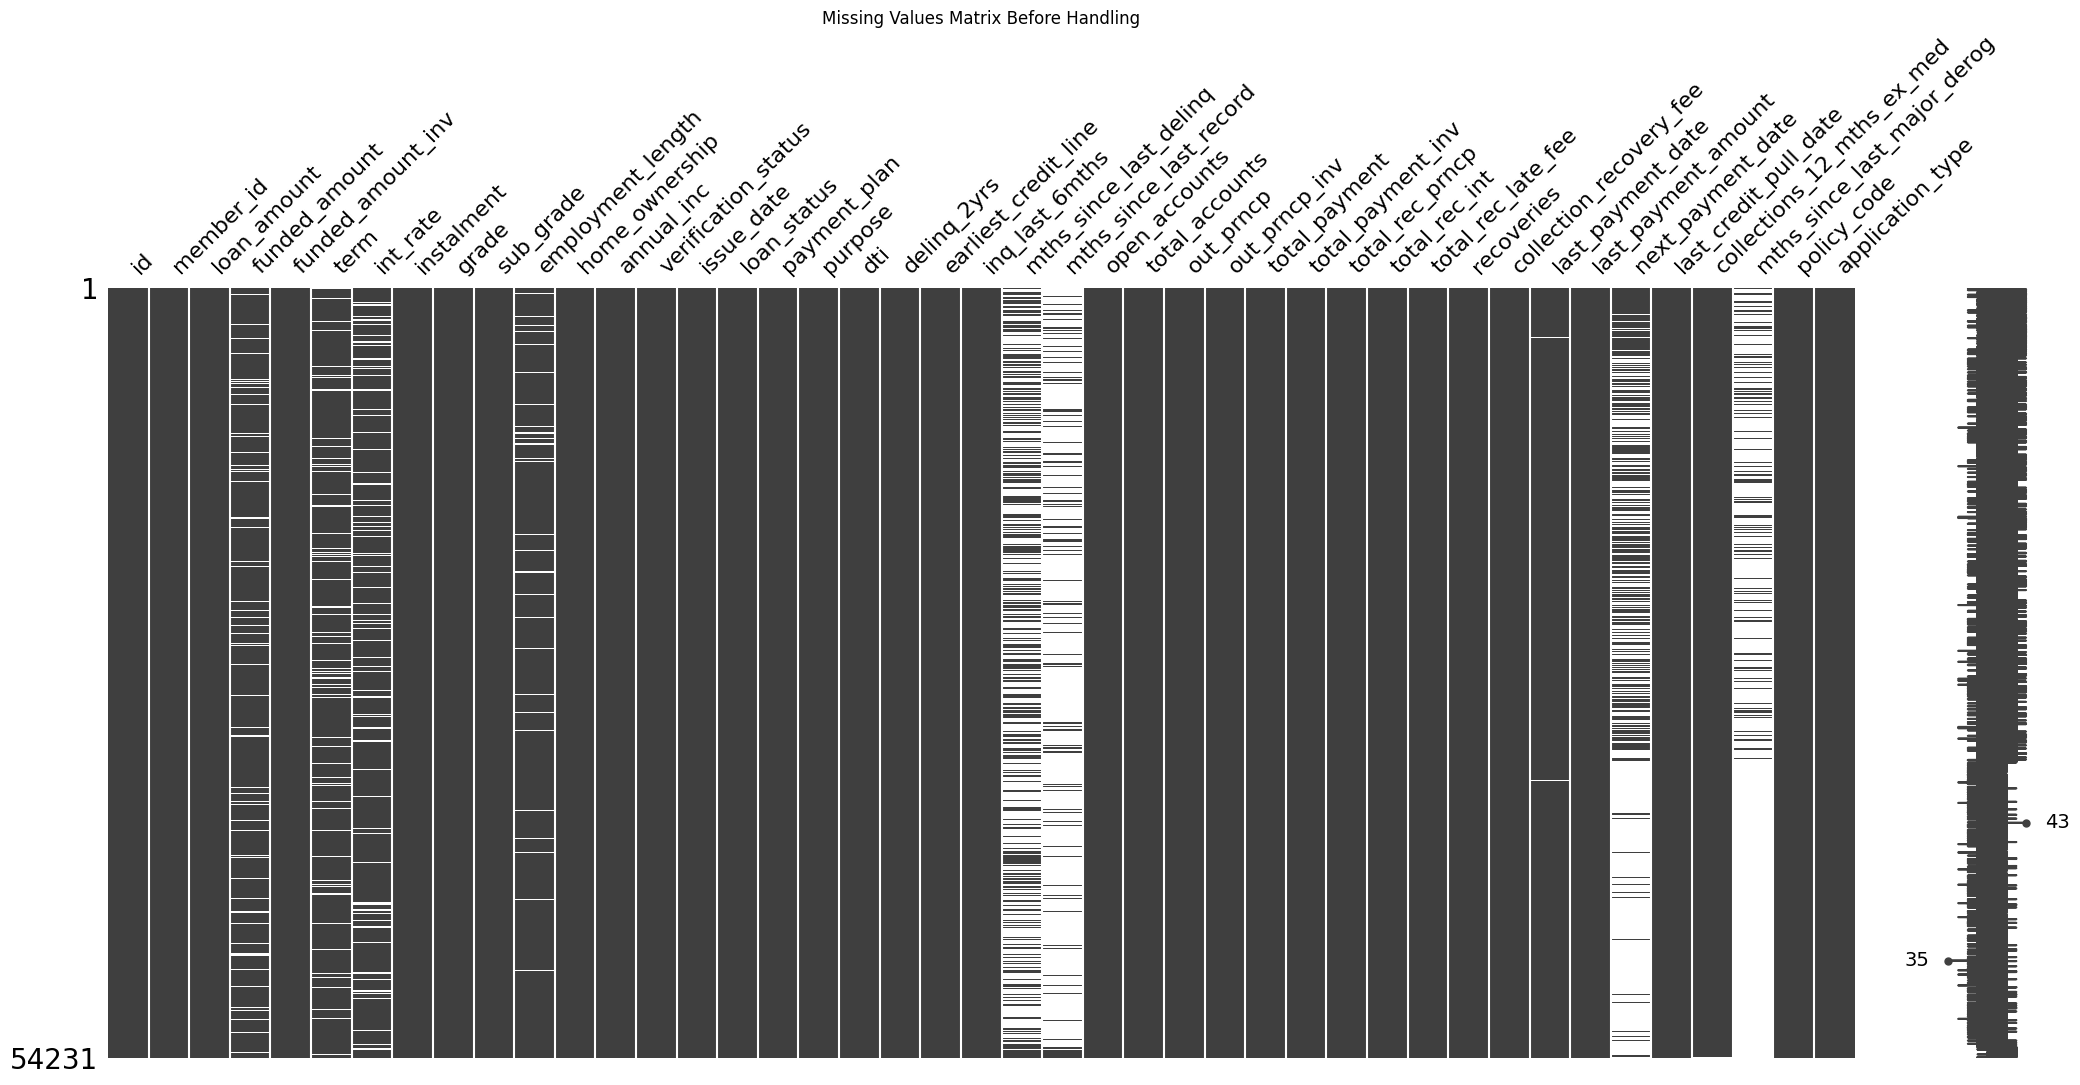

In [10]:
from db_utils import Plotter
print("Initial Null Count: ")
initial_null = calculator.count_null_values(loans_df)
print(initial_null)
null_percentage = calculator.calculate_null_percentage(loans_df, columns)
print("------------------------------------------------------------------------------------------")
print("Initial Null Percentages:\n", null_percentage)

plotter = Plotter
plotter.show_matrix_before(loans_df)


This matrix visualisation shows the presence / abscence of null values in each of the columns.
It also shows the 4 columns which had the most nulls and were then dropped.

In [11]:
print("Dropped Columns with High Nulls (>50%): ")
high_null = calculator.drop_high_null_columns(loans_df)
print(high_null)

Dropped Columns with High Nulls (>50%): 
(             id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0      38676116   41461848         8000         8000.0             8000.0   
1      38656203   41440010        13200        13200.0            13200.0   
2      38656154   41439961        16000        16000.0            16000.0   
3      38656128   41439934        15000        15000.0            15000.0   
4      38656121   41439927        15000        15000.0            15000.0   
...         ...        ...          ...            ...                ...   
54226     76597      76583         5000         5000.0             1775.0   
54227    142608      74724         5000         5000.0             2350.0   
54228    117045      70978         3500         3500.0             2225.0   
54229     88854      70699         5000         5000.0              225.0   
54230     72323      70694         5000         5000.0              350.0   

            term  int_rate  insta

As there is a significant amount of nulls (>50%), I am going to drop these rows completely from the data set as it could potentially make the data less reliable. For the rest of the columns with nulls we are going to impute the nulls. Columns dropped were as follows: ['mths_since_last_delinq', 'mths_since_last_record', 'next_payment_date', 'mths_since_last_major_derog']

Columns updated with imputed nulls: 
             id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0      38676116   41461848         8000         8000.0             8000.0   
1      38656203   41440010        13200        13200.0            13200.0   
2      38656154   41439961        16000        16000.0            16000.0   
3      38656128   41439934        15000        15000.0            15000.0   
4      38656121   41439927        15000        15000.0            15000.0   
...         ...        ...          ...            ...                ...   
54226     76597      76583         5000         5000.0             1775.0   
54227    142608      74724         5000         5000.0             2350.0   
54228    117045      70978         3500         3500.0             2225.0   
54229     88854      70699         5000         5000.0              225.0   
54230     72323      70694         5000         5000.0              350.0   

            term  int_rate  instalment

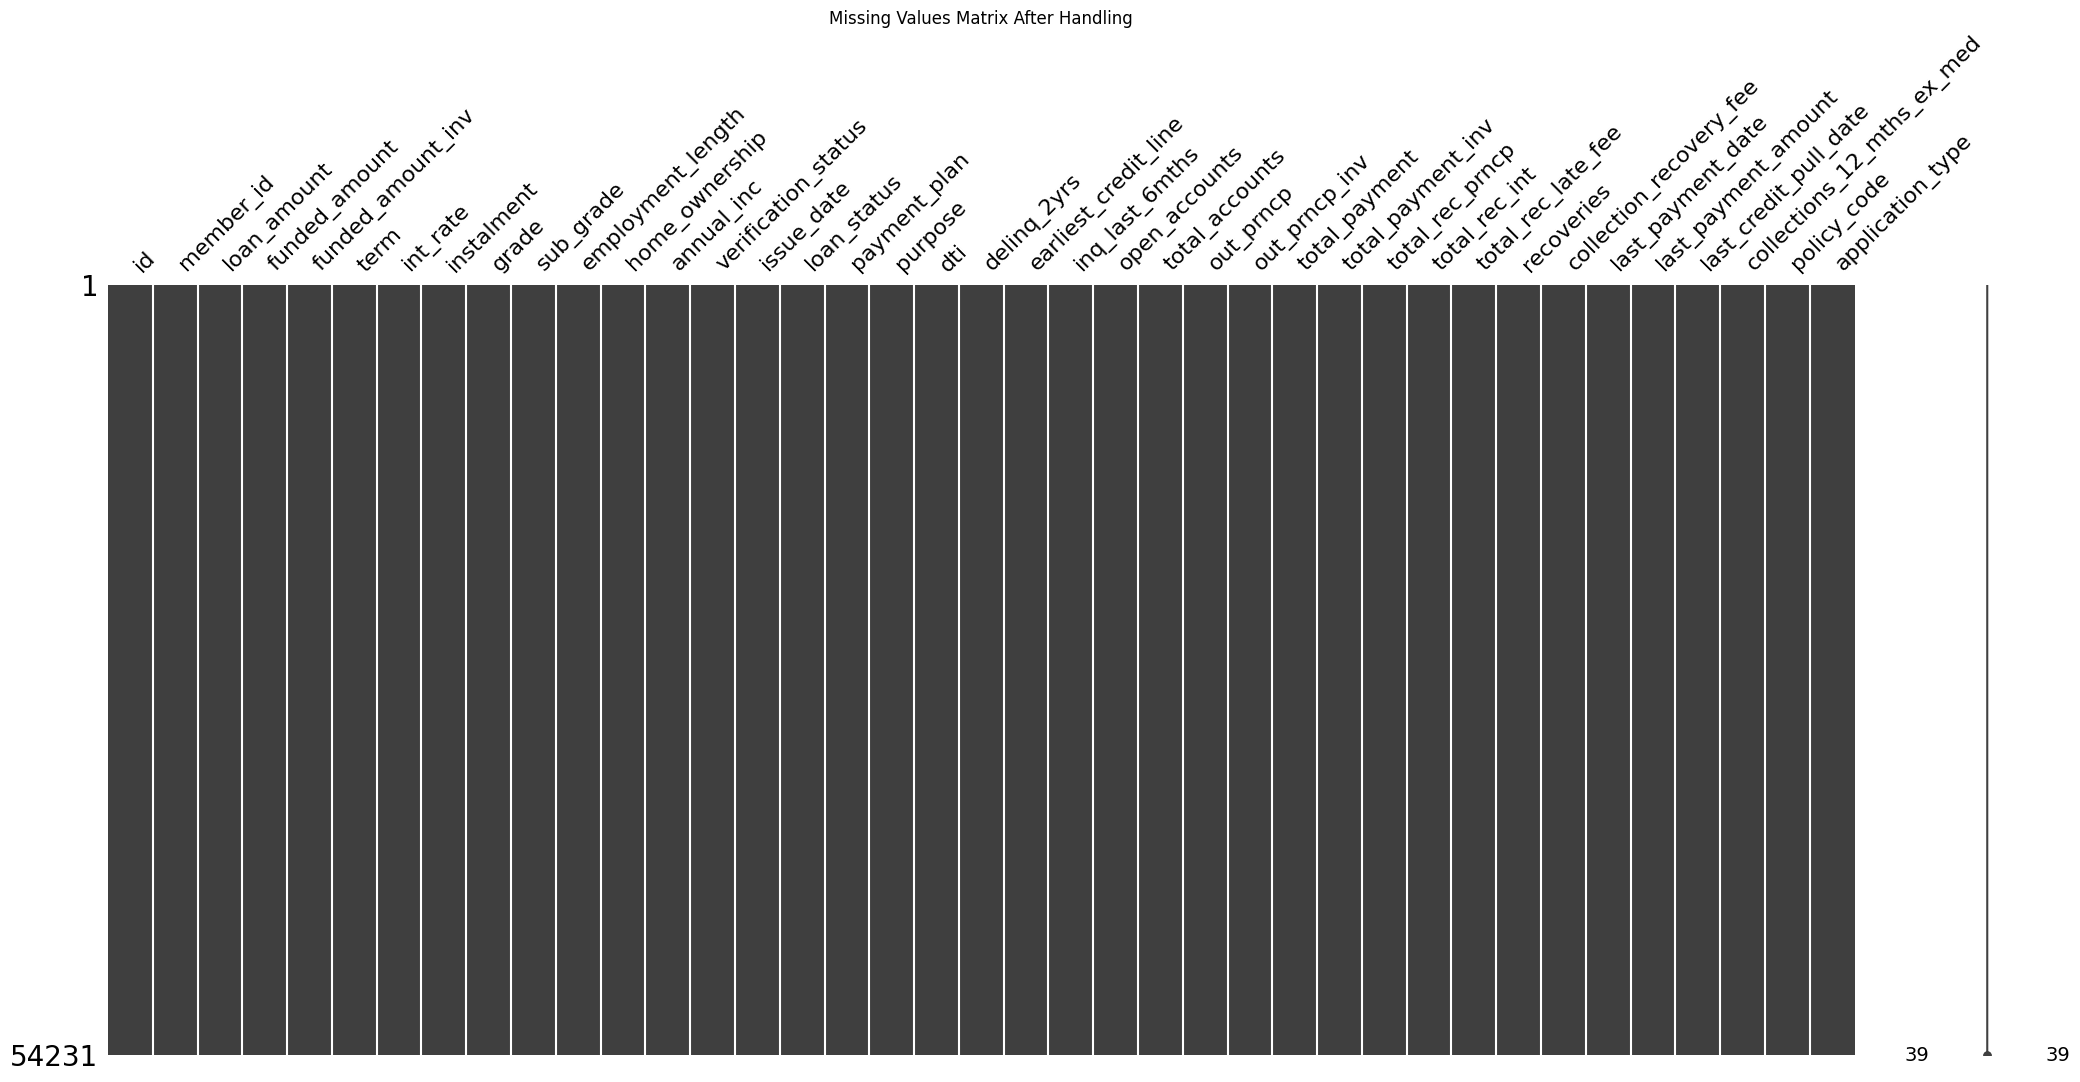

In [12]:
print("Columns updated with imputed nulls: ")
imputed_nulls = calculator.impute_nulls(loans_df)
print(imputed_nulls)
print("Null count following imputing: ")
imputed_nulls_count = loans_df.isnull().sum()
print(imputed_nulls_count)

plotter.show_matrix_after(loans_df)

This matrix visulisation shows the same plot following imputing the null values and dropping the column with high nulls and shows that all null values have been removed and the nulll count is 0.

## Data Cleaning/ Formatting

In [13]:
from db_utils import DataFrameTransform
transformations = DataFrameTransform
date_columns = ['issue_date','earliest_credit_line','last_payment_date',"last_credit_pull_date"]
transformations._convert_to_datetime(loans_df, date_columns)




c:\Users\justi\OneDrive\Documents\AI Core Project\exploratory-data-analysis---customer-loans-in-finance258\db_utils.py:57: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
c:\Users\justi\OneDrive\Documents\AI Core Project\exploratory-data-analysis---customer-loans-in-finance258\db_utils.py:57: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
c:\Users\justi\OneDrive\Documents\AI Core Project\exploratory-data-analysis---customer-loans-in-finance258\db_utils.py:57: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[co

This changes all collumns with dates to the datetime format to benefit us llater on when analysing and then I have ran a check to insure this has been implemented.

In [14]:
datetime_columns = loans_df.select_dtypes(include=['datetime64']).columns.tolist()
# List of columns with datetime data type

print(datetime_columns)

['issue_date', 'earliest_credit_line', 'last_payment_date', 'last_credit_pull_date']


Date time columns formatted

In [15]:
category_columns = ['term','grade','sub_grade','employment_length']
transformations.convert_to_category(loans_df,category_columns)
category_columns_up = loans_df.select_dtypes(include=['category']).columns.tolist()
print(category_columns_up)

['term', 'grade', 'sub_grade', 'employment_length']


Category columns fomatted

In [16]:
transformations.convert_to_int(loans_df, 'collections_12_mths_ex_med')
   


,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36 months,7.49,248.82,A,A4,5 years,MORTGAGE,46000.0,Not Verified,2021-01-01,Current,n,credit_card,19.54,2,1987-10-01,1,12,27,5529.70,5529.70,2982.51,2982.51,2470.30,512.21,0.000000,0.00,0.00,2022-01-01,248.82,2022-01-01,0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36 months,6.99,407.52,A,A3,9 years,RENT,50000.0,Not Verified,2021-01-01,Current,n,credit_card,24.20,0,2001-09-01,0,15,31,9102.83,9102.83,4885.11,4885.11,4097.17,787.94,0.000000,0.00,0.00,2022-01-01,407.52,2022-01-01,0,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36 months,7.49,497.63,A,A4,8 years,MORTGAGE,73913.0,Source Verified,2021-01-01,Fully Paid,n,credit_card,16.92,0,1998-09-01,0,7,18,0.00,0.00,16824.54,16824.54,16000.00,824.54,0.000000,0.00,0.00,2021-10-01,12850.16,2021-10-01,0,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36 months,14.31,514.93,C,C4,1 year,RENT,42000.0,Source Verified,2021-01-01,Fully Paid,n,debt_consolidation,35.52,0,2008-06-01,0,6,13,0.00,0.00,15947.47,15947.47,15000.00,947.47,0.000000,0.00,0.00,2021-06-01,13899.67,2021-06-01,0,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36 months,6.03,456.54,A,A1,10+ years,MORTGAGE,145000.0,Verified,2021-01-01,Current,n,debt_consolidation,3.33,0,2002-04-01,1,23,50,10297.47,10297.47,5473.46,5473.46,4702.53,770.93,0.000000,0.00,0.00,2022-01-01,456.54,2022-01-01,0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,76597,76583,5000,5000.0,1775.0,36 months,9.01,159.03,B,B2,1 year,MORTGAGE,250000.0,Not Verified,2013-07-01,Fully Paid,n,other,10.00,2,2003-04-01,0,5,7,0.00,0.00,5724.82,2032.29,5000.00,724.82,0.000000,0.00,0.00,2016-07-01,160.61,2016-07-01,0,1,INDIVIDUAL
54227,142608,74724,5000,5000.0,2350.0,36 months,10.59,162.73,C,C2,< 1 year,RENT,15000.0,Not Verified,2013-10-01,Fully Paid,n,other,24.40,0,1999-01-01,3,6,6,0.00,0.00,5931.25,2787.47,5000.00,826.31,104.942381,0.00,0.00,2016-10-01,490.01,2016-09-01,0,1,INDIVIDUAL
54228,117045,70978,3500,3500.0,2225.0,36 months,7.43,108.77,A,A2,10+ years,MORTGAGE,300000.0,Not Verified,2013-08-01,Does not meet the credit policy. Status:Fully ...,n,debt_consolidation,1.00,0,1984-02-01,0,8,18,0.00,0.00,3915.37,2489.01,3500.00,415.37,0.000000,0.00,0.00,2016-09-01,110.58,2013-05-01,0,1,INDIVIDUAL
54229,88854,70699,5000,5000.0,225.0,36 months,7.43,155.38,A,A2,4 years,RENT,200000.0,Not Verified,2013-08-01,Fully Paid,n,house,0.28,0,1995-03-01,0,2,2,0.00,0.00,5174.18,232.84,5000.00,174.18,0.000000,0.00,0.00,2014-03-01,0.00,2013-05-01,0,1,INDIVIDUAL


Integer columns formatted

In [17]:
int_columns_up = loans_df.select_dtypes(include=['int64']).columns.tolist()
print(int_columns_up)


['id', 'member_id', 'loan_amount', 'delinq_2yrs', 'inq_last_6mths', 'open_accounts', 'total_accounts', 'policy_code']


In [18]:
object_columns = ['id','member_id','home_ownership','verification_status','loan_status','payment_plan','purpose','policy_code','application_type']
transformations.convert_to_object(loans_df,object_columns)
object_columns_up = loans_df.select_dtypes(include=['object']).columns.tolist()
# List of columns with datetime data type

print(object_columns_up)

['id', 'member_id', 'home_ownership', 'verification_status', 'loan_status', 'payment_plan', 'purpose', 'policy_code', 'application_type']


Object colums formatted 

In [19]:
float_columns = loans_df.select_dtypes(include=['float64']).columns.tolist()
print(float_columns)


['funded_amount', 'funded_amount_inv', 'int_rate', 'instalment', 'annual_inc', 'dti', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_amount']


In [20]:
loans_df_c = loans_df.copy()

In [21]:
transformations.drop_rows_date_columns(loans_df)


,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,loan_status,payment_plan,purpose,dti,delinq_2yrs,inq_last_6mths,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_amount,collections_12_mths_ex_med,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36 months,7.49,248.82,A,A4,5 years,MORTGAGE,46000.0,Not Verified,Current,n,credit_card,19.54,2,1,12,27,5529.70,5529.70,2982.51,2982.51,2470.30,512.21,0.000000,0.00,0.00,248.82,0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36 months,6.99,407.52,A,A3,9 years,RENT,50000.0,Not Verified,Current,n,credit_card,24.20,0,0,15,31,9102.83,9102.83,4885.11,4885.11,4097.17,787.94,0.000000,0.00,0.00,407.52,0,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36 months,7.49,497.63,A,A4,8 years,MORTGAGE,73913.0,Source Verified,Fully Paid,n,credit_card,16.92,0,0,7,18,0.00,0.00,16824.54,16824.54,16000.00,824.54,0.000000,0.00,0.00,12850.16,0,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36 months,14.31,514.93,C,C4,1 year,RENT,42000.0,Source Verified,Fully Paid,n,debt_consolidation,35.52,0,0,6,13,0.00,0.00,15947.47,15947.47,15000.00,947.47,0.000000,0.00,0.00,13899.67,0,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36 months,6.03,456.54,A,A1,10+ years,MORTGAGE,145000.0,Verified,Current,n,debt_consolidation,3.33,0,1,23,50,10297.47,10297.47,5473.46,5473.46,4702.53,770.93,0.000000,0.00,0.00,456.54,0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,76597,76583,5000,5000.0,1775.0,36 months,9.01,159.03,B,B2,1 year,MORTGAGE,250000.0,Not Verified,Fully Paid,n,other,10.00,2,0,5,7,0.00,0.00,5724.82,2032.29,5000.00,724.82,0.000000,0.00,0.00,160.61,0,1,INDIVIDUAL
54227,142608,74724,5000,5000.0,2350.0,36 months,10.59,162.73,C,C2,< 1 year,RENT,15000.0,Not Verified,Fully Paid,n,other,24.40,0,3,6,6,0.00,0.00,5931.25,2787.47,5000.00,826.31,104.942381,0.00,0.00,490.01,0,1,INDIVIDUAL
54228,117045,70978,3500,3500.0,2225.0,36 months,7.43,108.77,A,A2,10+ years,MORTGAGE,300000.0,Not Verified,Does not meet the credit policy. Status:Fully ...,n,debt_consolidation,1.00,0,0,8,18,0.00,0.00,3915.37,2489.01,3500.00,415.37,0.000000,0.00,0.00,110.58,0,1,INDIVIDUAL
54229,88854,70699,5000,5000.0,225.0,36 months,7.43,155.38,A,A2,4 years,RENT,200000.0,Not Verified,Fully Paid,n,house,0.28,0,0,2,2,0.00,0.00,5174.18,232.84,5000.00,174.18,0.000000,0.00,0.00,0.00,0,1,INDIVIDUAL


This shows the dataframe following the date columns being dropped. As we solely want numerical columns left in the data frame so we can analyse the skew of the data.

## Transformations / Skew of the Data

Skewness for numerical columns:
loan_amount                    0.805259
funded_amount                  0.845563
funded_amount_inv              0.813927
int_rate                       0.433193
instalment                     0.996981
annual_inc                     8.711831
dti                            0.189420
delinq_2yrs                    5.370002
inq_last_6mths                 3.248918
open_accounts                  1.059282
total_accounts                 0.779014
out_prncp                      2.356426
out_prncp_inv                  2.356848
total_payment                  1.267891
total_payment_inv              1.256197
total_rec_prncp                1.261015
total_rec_int                  2.204322
total_rec_late_fee            13.184305
recoveries                    14.589793
collection_recovery_fee       27.636843
last_payment_amount            2.499381
collections_12_mths_ex_med    20.262376
dtype: float64


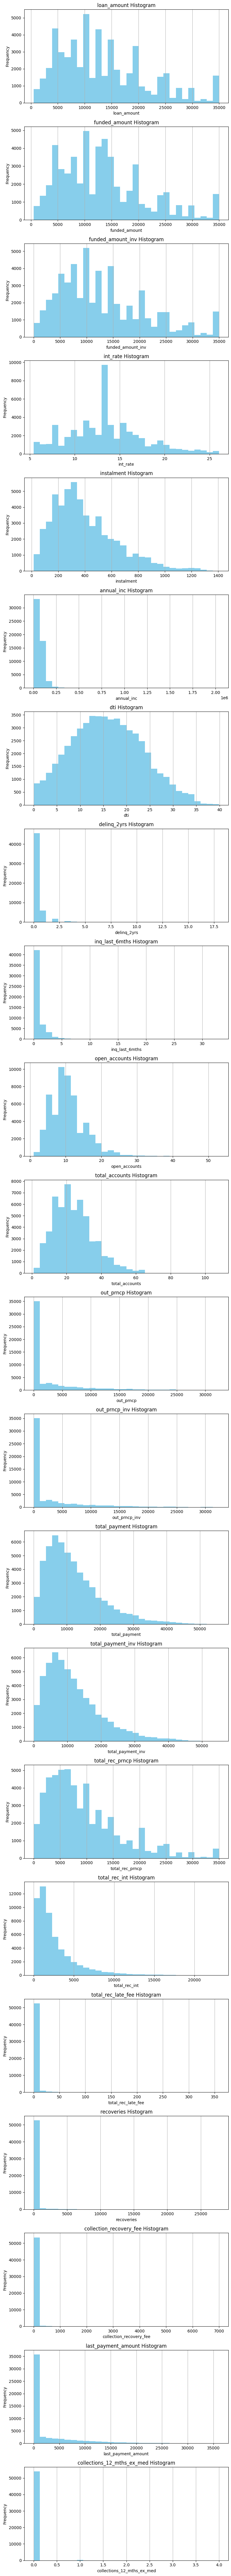

In [22]:
from Skewness import calculate_numerical_skewness
from Skewness import plot_numerical_histograms
numerical_skew = calculate_numerical_skewness(loans_df)
print("Skewness for numerical columns:")
print(numerical_skew)

plot_numerical_histograms(loans_df)

Majority of columns such as: 
follow  right-skew meaning a concentration of values on the left side with a gradual decrease toward larger values on the right side, emphasizing the asymmetry of the distribution.

## Current State of Loans

In [23]:


# Calculates current total funded amount and total payments (considered as recovered amount)
total_funded = loans_df_c['funded_amount'].sum()
total_investor_funded = loans_df_c['funded_amount_inv'].sum()
total_payments = loans_df_c['total_payment'].sum()

# Calculate recovery percentages against investor funding and total funded amount using total payments as recovered amount
recovery_percentage_investor_funded = (total_payments / total_investor_funded) * 100
recovery_percentage_total_funded = (total_payments / total_funded) * 100

print(f"Recovery Percentage against Investor Funding using Total Payments: {recovery_percentage_investor_funded:.2f}%")
print(f"Recovery Percentage against Total Funding using Total Payments: {recovery_percentage_total_funded:.2f}%")


Recovery Percentage against Investor Funding using Total Payments: 93.26%
Recovery Percentage against Total Funding using Total Payments: 91.31%


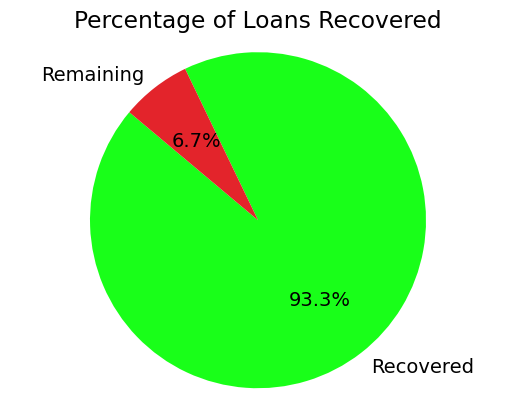

93.25685229150591

In [24]:
from predictions import summarize_recovery
#This function calculate the percentage of loans recovered by dividing the toal amount recovered by the total amount funded)
summarize_recovery(loans_df_c)


We can see majority of the Loans have been recovered. This would mean higher revenue and minimized losses contribute to financial health of the loans company, Effective risk assessment and strong collection practices as majority of lenders were able to pay back and this will mean a positive reputation and attractiveness to investors.

## Charged Off Loans 

In [25]:
from predictions import calculate_historical_charged_off
calculate_historical_charged_off(loans_df_c)

Total amount of Charged Off Loans: 5571
Total Amount paid unti Charged Off occured: 37400589.040819496
Historical Percentage of Charged Off Loans: 10.272722243735133
10.27 %


In [26]:
charged_off_loans = len(loans_df[loans_df['loan_status'] == 'Charged Off']) #Using loan status to extract loans that were Charged Off
print("Total amount of Charged Off: ", charged_off_loans)
percentage_charged_off = (charged_off_loans /len(loans_df)) * 100  #Calculated the percentage of charged off loans compared to entire dataset
print("Percentage of Charged Off Loans: ", percentage_charged_off)
print(round(percentage_charged_off,2), '%')
amount_paid_until_charged_off = loans_df.loc[loans_df['loan_status'] == 'Charged Off', 'total_payment'].sum().round(4)
print("Amount paid until Charge Off occured: ", amount_paid_until_charged_off)

Total amount of Charged Off:  5571
Percentage of Charged Off Loans:  10.272722243735133
10.27 %
Amount paid until Charge Off occured:  37400589.0408


This function's outputs and analyses are beneficial for assessing the impact, scale, and proportion of loans categorized as "Charged Off," helps gauge the performance or risk associated with the loan portfolio and provides insight into the financial impact of these defaulted loans.

## Projected Loss

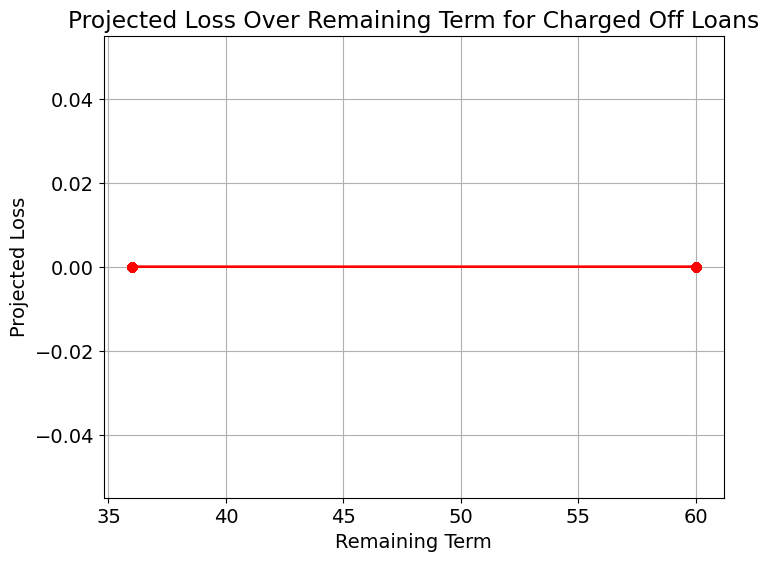

7        0.0
56       0.0
83       0.0
90       0.0
117      0.0
        ... 
54152    0.0
54156    0.0
54180    0.0
54194    0.0
54198    0.0
Length: 5571, dtype: float64

In [27]:
from predictions import calculate_projected_loss
calculate_projected_loss(loans_df_c)

## Possible Loss 

## Indicators of Loss

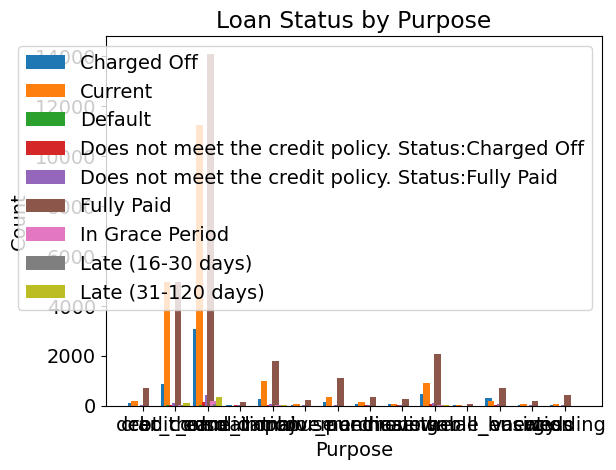

In [28]:
from predictions import plot_possible_indicators
plot_possible_indicators(loans_df_c)